In [ ]:

%load_ext autoreload
%autoreload 2
from pandas import DataFrame
%matplotlib inline
import vectorbtpro as vbt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from configs.config import Config
import tensorflow as tf
from common.modelTester import ModelTester
from services.createPortfolioWrap import createPortfolioWrap

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

In [13]:
pf50EthWrap = createPortfolioWrap(Config.secondDir, Config.relativeDownloadDataPath, Config.secondTicker, 50, .75, .6)
pf50eth = pf50EthWrap.portfolio
pf50eth.stats()

  0%|          | 0/2 [00:00<?, ?it/s]

Start                         2017-01-06 02:00:00+00:00
End                           2022-12-31 23:00:00+00:00
Period                               2185 days 22:00:00
Start Value                                 10440.35364
Min Value                                   9881.278539
Max Value                                   77233.51228
End Value                                  71551.003074
Total Return [%]                             585.331221
Benchmark Return [%]                       11936.858006
Total Time Exposure [%]                       63.611757
Max Gross Exposure [%]                       102.031351
Max Drawdown [%]                               15.74555
Max Drawdown Duration                 264 days 09:00:00
Total Orders                                       1143
Total Fees Paid                                     0.0
Total Trades                                        808
Win Rate [%]                                  37.050805
Best Trade [%]                                  

<Axes: ylabel='Frequency'>

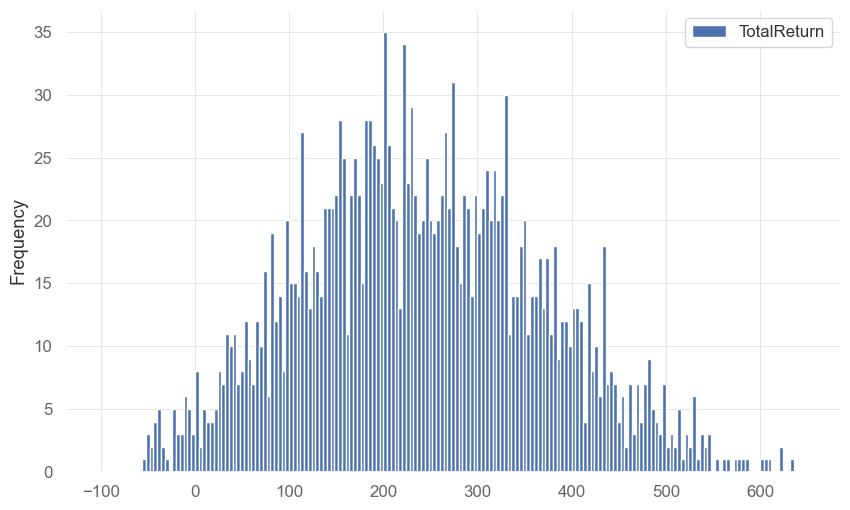

In [18]:
modelTester = ModelTester()

randomDf = modelTester.createRandomPortfolios(pf50eth.close)
bins = [x for x in range(-100, 650, 4)]
randomDf.plot.hist(bins=bins, column=["TotalReturn"])#, "WinRate", "MaxDrawdown"])

In [22]:
(randomDf[randomDf["TotalReturn"] > 585].count()['TotalReturn']) / 2000
#randomDf[randomDf["TotalReturn"] < 585].count()

0.0045

In [23]:
pf100EthWrap = createPortfolioWrap(Config.secondDir, Config.relativeDownloadDataPath, Config.secondTicker, 100, .9, .45)
pf100eth = pf100EthWrap.portfolio
pf100eth.stats()

  0%|          | 0/2 [00:00<?, ?it/s]

Start                         2017-01-06 02:00:00+00:00
End                           2022-12-31 23:00:00+00:00
Period                               2185 days 22:00:00
Start Value                                11435.160344
Min Value                                    9909.64512
Max Value                                  68177.566235
End Value                                  62002.305341
Total Return [%]                             442.207573
Benchmark Return [%]                       11936.858006
Total Time Exposure [%]                       47.270405
Max Gross Exposure [%]                       103.571748
Max Drawdown [%]                               27.66499
Max Drawdown Duration                 489 days 16:00:00
Total Orders                                        960
Total Fees Paid                                     0.0
Total Trades                                        689
Win Rate [%]                                  39.622642
Best Trade [%]                                  

In [24]:
pf_join = vbt.PF.column_stack((pf50eth, pf100eth), group_by=True)
pf_join.stats()

Start                         2017-01-06 02:00:00+00:00
End                           2022-12-31 23:00:00+00:00
Period                               2185 days 22:00:00
Start Value                                21866.810763
Min Value                                  20338.958604
Max Value                                 143486.480027
End Value                                 133544.605195
Total Return [%]                             510.718255
Benchmark Return [%]                       11941.648802
Total Time Exposure [%]                       75.858717
Max Gross Exposure [%]                        99.818415
Max Drawdown [%]                              11.006214
Max Drawdown Duration                 204 days 23:00:00
Total Orders                                       2103
Total Fees Paid                                     0.0
Total Trades                                       1497
Win Rate [%]                                  38.235294
Best Trade [%]                                  

In [46]:
from services.monteCarlo import MonteCarloCheck

mc = MonteCarloCheck()

shape of detrended close to create random (52461,)
meanReaturn is 0.00021454833181117116 count random greater 0 random max: 0.00017913106114323475
pValue is 0.0


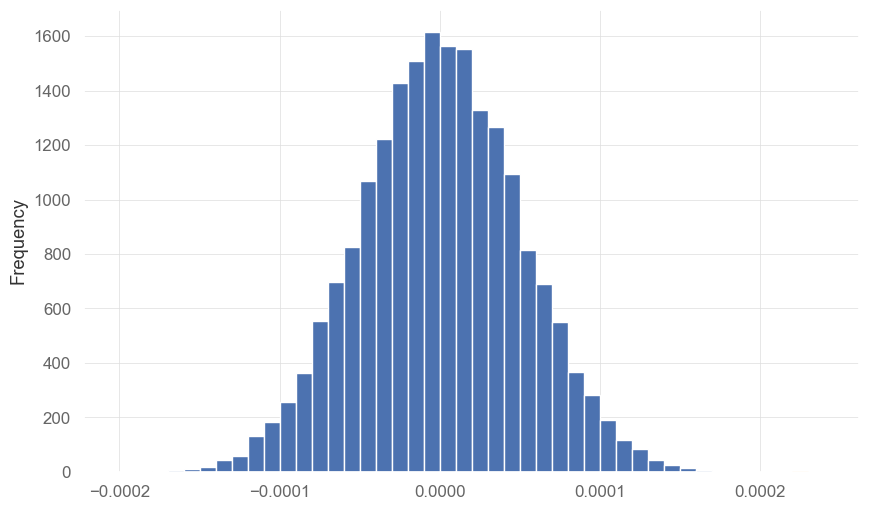

In [47]:
mc.run(pf50eth, pf50EthWrap.close)

originalMean is 0.00021454833181117116 count random greater 0.0 random max: 0.00015530023063045333


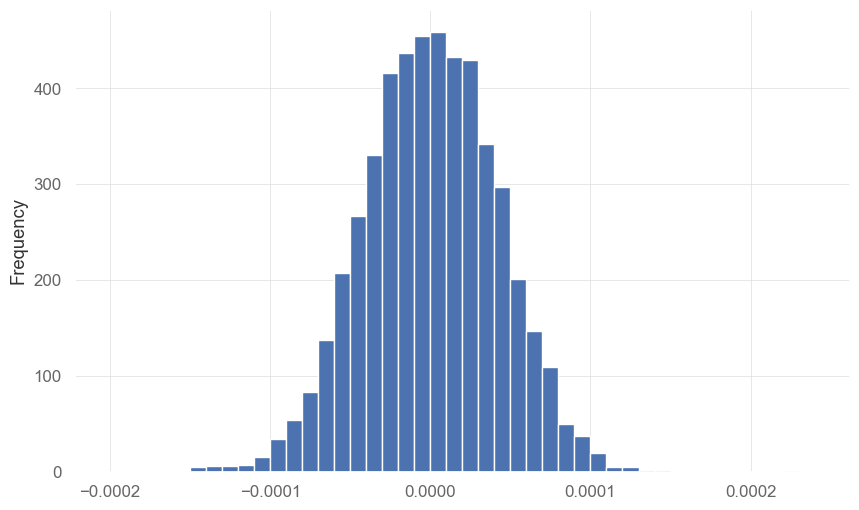

In [52]:
from services.whitesCheck import WhitesCheck

wc = WhitesCheck()
wc.run(pf50eth, pf50EthWrap.close)